# **Modelagem Matemática na Quarentena**

**módulo 3 - modelo com vacinação**

###**Carregando os pacotes necessários**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math # pacote com as funções matemáticas
from scipy.integrate import odeint, solve_ivp # pacote para resolução de equações diferenciais

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Modelo SIRV**

###**modelo com perda de imunidade - $\omega V$**

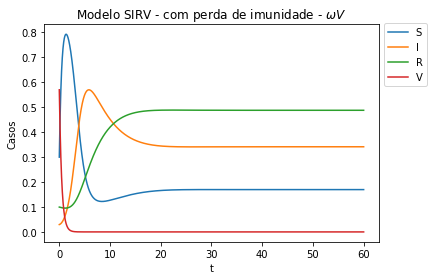

In [2]:
N = 1; I0 = 0.03; R0 = 0.10; V0 = 0.570; S0 = N - I0 - R0 - V0; # N = 1500; I0 = 500; R0 = 0; V0 = 450; S0 = N - I0 - R0 - V0;
p = 0.01; mi = 0.1; beta = 1.428; gamma = 0.1428; omega = 2.015;
a = 0; d = 60; i = 0.01
t = np.linspace(a, d, int(1 + (d - a) / i))

def deriv(y, t, N, beta, mi, gamma, omega):
    S, I, R, V = y
    dSdt = (1 - p) * mi * N - beta * S * I - mi * S + omega * V
    dIdt = beta * S * I - gamma * I - mi * I
    dRdt = gamma * I - mi * R
    dVdt = p * mi * N - mi * V - omega * V
    return dSdt, dIdt, dRdt, dVdt

# Initial conditions vector
y0 = S0, I0, R0, V0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, mi, gamma, omega)) # 'odeint' função para resolver a EDO usando o método de Euler
S, I, R, V = ret.T

ax = plt.subplot(111)
ax.plot(t, S, label = "S")
ax.plot(t, I, label = "I")
ax.plot(t, R, label = "R")
ax.plot(t, V, label = "V")

plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIRV - com perda de imunidade - $\omega V$")
# plt.title(r"Modelo SIRV, N = {0:.2f}, $\beta$ = {1:.4f}, $\mu$ = {2:.4f}, $\gamma$ = {3:.4f}, $\omega$ = {4:.4f},  $S_0$ = {5:.2f}, $I_0$ = {6:.2f}, $R_0$ = {7:.2f}, $V_0$ = {8:.2f}".format(N, beta, mi, gamma, omega, S0, I0, R0, V0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.86))
plt.show()

###**modelo sem perda de imunidade (vacina 100% eficaz) - $\omega = 0$**

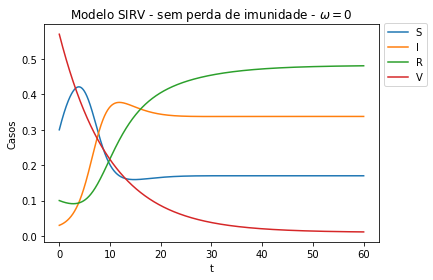

In [3]:
N = 1; I0 = 0.03; R0 = 0.10; V0 = 0.57; S0 = N - I0 - R0 - V0; # N = 1500; I0 = 500; R0 = 0; V0 = 450; S0 = N - I0 - R0 - V0;
p = 0.01; mi = 0.1; beta = 1.428; gamma = 0.1428; omega = 0;
a = 0; d = 60; i = 0.01
t = np.linspace(a, d, int(1 + (d - a) / i))

def deriv(y, t, N, beta, mi, gamma, omega):
    S, I, R, V = y
    dSdt = (1 - p) * mi * N - beta * S * I - mi * S + omega * V
    dIdt = beta * S * I - gamma * I - mi * I
    dRdt = gamma * I - mi * R
    dVdt = p * mi * N - mi * V - omega * V
    return dSdt, dIdt, dRdt, dVdt

# Initial conditions vector
y0 = S0, I0, R0, V0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, mi, gamma, omega)) # 'odeint' função para resolver a EDO usando o método de Euler
S, I, R, V = ret.T

ax = plt.subplot(111)
ax.plot(t, S, label = "S")
ax.plot(t, I, label = "I")
ax.plot(t, R, label = "R")
ax.plot(t, V, label = "V")

plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIRV - sem perda de imunidade - $\omega = 0$")
# plt.title(r"Modelo SIRV, N = {0:.2f}, $\beta$ = {1:.4f}, $\mu$ = {2:.4f}, $\gamma$ = {3:.4f}, $\omega$ = {4:.4f},  $S_0$ = {5:.2f}, $I_0$ = {6:.2f}, $R_0$ = {7:.2f}, $V_0$ = {8:.2f}".format(N, beta, mi, gamma, omega, S0, I0, R0, V0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.86))
plt.show()

###**modelo com adimensionalização**

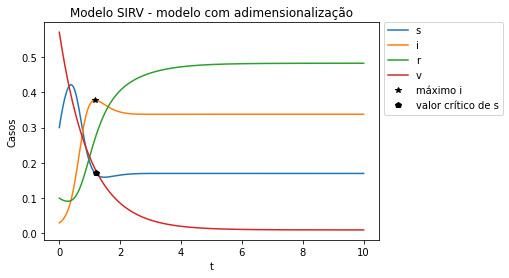

In [4]:
N = 1; i0 = 0.03; r0 = 0.10; v0 = 0.57; s0 = N - i0 - r0 - v0; # N = 15000; i0 = 560; r0 = 0; v0 = 700; s0 = N - i0 - r0 - v0;
p = 0.01; mi = 0.1; beta = 1.428; gamma = 0.1428; # p = 0.01; mi = 0.02; beta = 0.0029; gamma = 26;
b = beta * (N / mi); c = gamma / mi;
a = 0; d = 10; i = 0.01
t = np.linspace(a, d, int(1 + (d - a) / i))

def deriv(y, t, N, b, c):
    s, i, r, v = y
    dsdt = (1 - p) - b * s * i - s
    didt = b * s * i - c * i - i
    drdt = c * i - r
    dvdt = p - v
    return dsdt, didt, drdt, dvdt

# Initial conditions vector
y0 = s0, i0, r0, v0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, b, c)) # 'odeint' função para resolver a EDO usando o método de Euler
s, i, r, v = ret.T

ax = plt.subplot(111)
ax.plot(t, s, label = "s")
ax.plot(t, i, label = "i")
ax.plot(t, r, label = "r")
ax.plot(t, v, label = "v")

imax = max(i);
smax = (c + 1) / b;
plt.plot(1.17, imax, "*", color = "black", label = "máximo i")
plt.plot(1.20, smax, "p", color = "black", label = "valor crítico de s")
plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIRV - modelo com adimensionalização")
# plt.title(r"Modelo SIRV, N = {0:.2f}, $\beta$ = {1:.4f}, $\mu$ = {2:.4f}, $\gamma$ = {3:.4f}, $S_0$ = {4:.2f}, $I_0$ = {5:.2f}, $R_0$ = {6:.2f}, $V_0$ = {7:.2f}".format(N, beta, mi, gamma, S0, I0, R0, V0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.79))
plt.show()

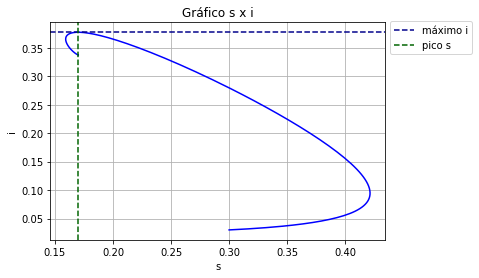

In [5]:
ax = plt.subplot(111)
ax.plot(s, i, color = 'blue')
ax.axhline(y = imax, xmin = 0, xmax = max(t), color = "darkblue", label = "máximo i", linestyle = '--')
ax.axvline(x = smax, ymin = 0, ymax = 1.0, color = "darkgreen", label = "pico s", linestyle = '--')
plt.xlabel("s")
plt.ylabel("i")
plt.grid()
plt.title("Gráfico s x i")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93))
plt.show()

In [6]:
print(f'O máximo da população de sobreviventes s para se ter declínio de população de infectados (i) é {smax:.2f}.')
print(f'Tem-se que o máximo de infectados é {imax:.2f}.')

O máximo da população de sobreviventes s para se ter declínio de população de infectados (i) é 0.17.
Tem-se que o máximo de infectados é 0.38.


###**modelo com adimensionalizado (simplificado)**

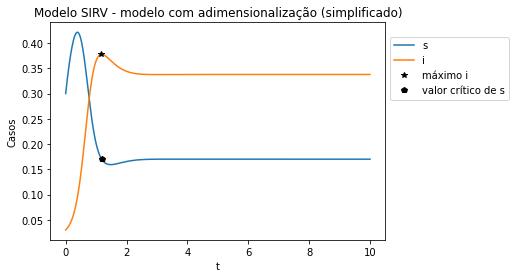

In [7]:
N = 1; i0 = 0.03; r0 = 0.10; v0 = 0.57; s0 = N - i0 - r0 - v0; # N = 15000; i0 = 560; r0 = 0; v0 = 700; s0 = N - i0 - r0 - v0;
p = 0.01; mi = 0.1; beta = 1.428; gamma = 0.1428; # p = 0.01; mi = 0.02; beta = 0.0029; gamma = 26;
b = beta * (N / mi); c = gamma / mi;
a = 0; d = 10; i = 0.01
t = np.linspace(a, d, int(1 + (d - a) / i))

def deriv(y, t, N, b, c):
    s, i = y
    dsdt = (1 - p) - b * s * i - s
    didt = b * s * i - c * i - i
    return dsdt, didt

# Initial conditions vector
y0 = s0, i0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, b, c)) # 'odeint' função para resolver a EDO usando o método de Euler
s, i = ret.T

ax = plt.subplot(111)
ax.plot(t, s, label = "s")
ax.plot(t, i, label = "i")

imax = max(i);
smax = (c + 1) / b;
plt.plot(1.17, imax, "*", color = "black", label = "máximo i")
plt.plot(1.20, smax, "p", color = "black", label = "valor crítico de s")
plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIRV - modelo com adimensionalização (simplificado)")
# plt.title(r"Modelo SIRV, N = {0:.2f}, $\beta$ = {1:.4f}, $\mu$ = {2:.4f}, $\gamma$ = {3:.4f}, $S_0$ = {4:.2f}, $I_0$ = {5:.2f}".format(N, beta, mi, gamma, S0, I0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.79))
plt.show()

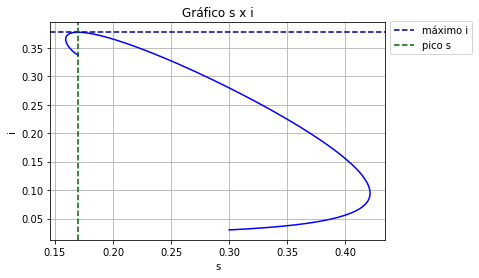

In [8]:
ax = plt.subplot(111)
imax = max(i);
smax = (c + 1) / b;
ax.plot(s, i, color = 'blue')
ax.axhline(y = imax, xmin = 0, xmax = max(t), color = "darkblue", label = "máximo i", linestyle = '--')
ax.axvline(x = smax, ymin = 0, ymax = 1.0, color = "darkgreen", label = "pico s", linestyle = '--')
plt.xlabel("s")
plt.ylabel("i")
plt.grid()
plt.title("Gráfico s x i")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93))
plt.show()

In [9]:
print(f'O máximo da população de sobreviventes s para se ter declínio de população de infectados (i) é {smax:.2f}.')
print(f'Tem-se que o máximo de infectados é {imax:.2f}.')

O máximo da população de sobreviventes s para se ter declínio de população de infectados (i) é 0.17.
Tem-se que o máximo de infectados é 0.38.
